In [77]:
%matplotlib inline

from collections import defaultdict
from glob import glob
from itertools import cycle
from pprint import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import numpy as np
import pandas as pd
import sys

"Done"

'Done'

In [111]:
def iter_results(g="metrics/latrec*json"):
    for p in glob(g):
        with open(p) as fp:
            yield json.load(fp)

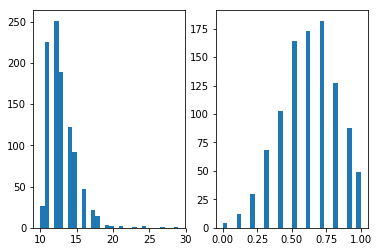

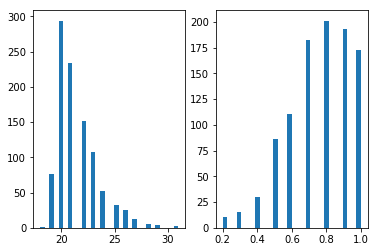

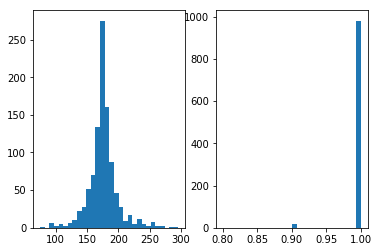

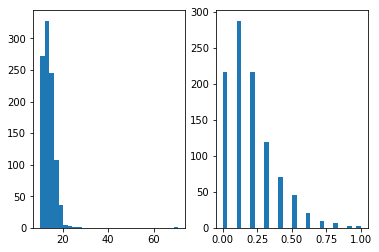

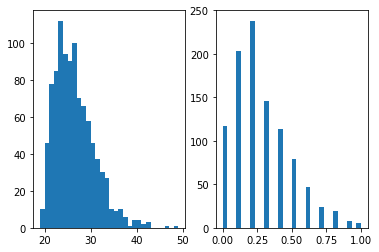

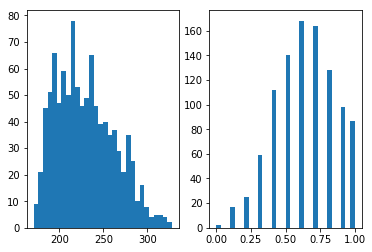

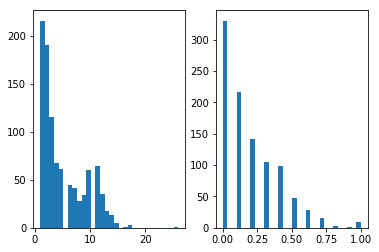

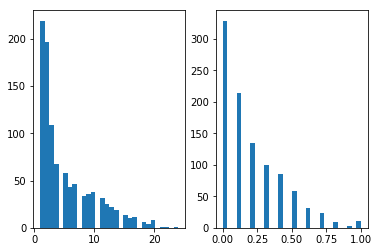

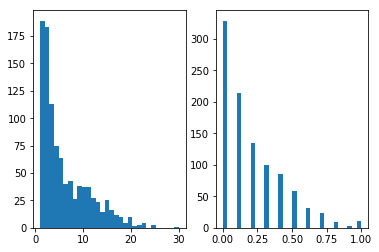

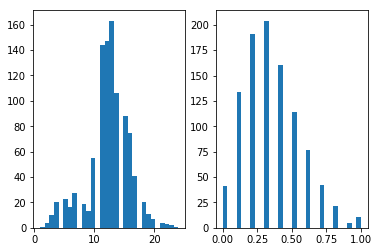

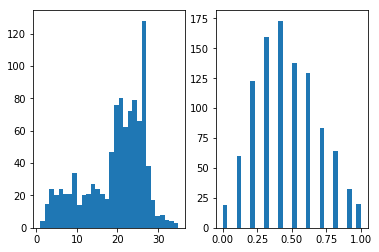

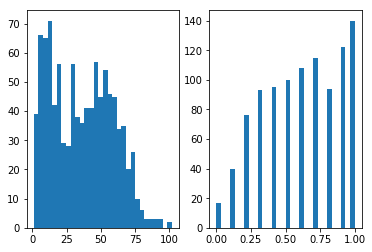

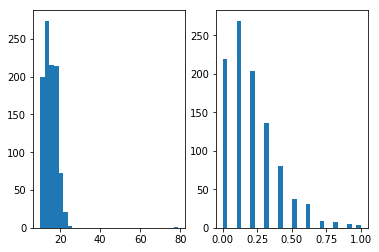

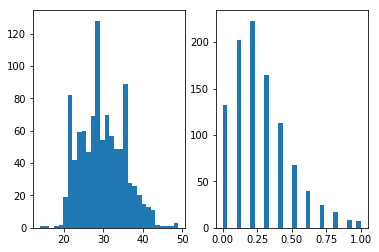

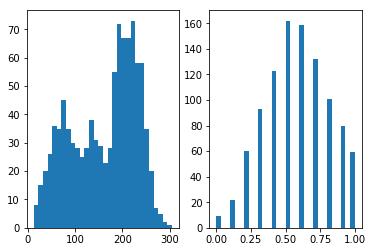

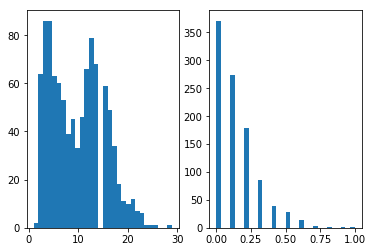

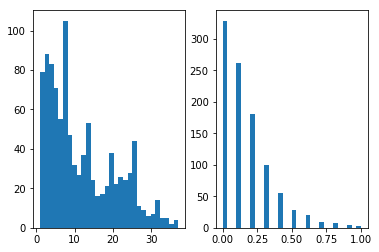

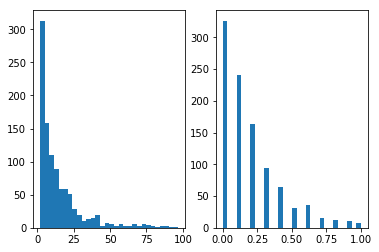

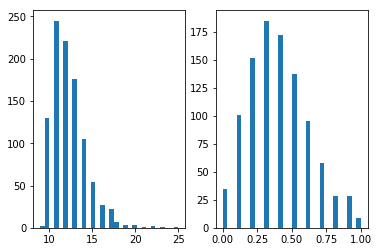

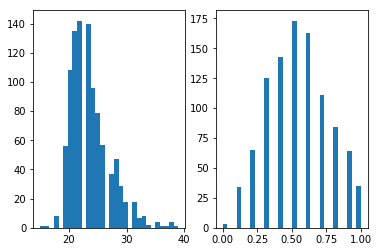

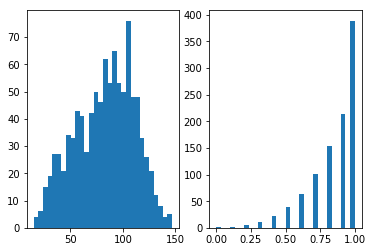

In [88]:
for r in iter_results():
    fig, (ax0, ax1) = plt.subplots(1, 2)
    ax0.hist(r["latencies"], bins=30)
    ax1.hist(r["recalls"], bins=30)
    plt.show()

,rec_50,lat_50,nb_docs,nb_tables,nb_bits,k2
9,0.9,17.0,10000,100,7,10
2,0.9,16.0,10000,100,8,10
11,0.8,14.0,10000,100,7,10
12,0.8,13.0,10000,100,8,10
13,0.8,12.0,10000,75,7,10
6,0.8,11.0,10000,75,8,10
3,0.8,10.0,10000,50,7,10
8,0.8,9.0,10000,50,8,10
10,0.7,10.0,10000,75,7,10
5,0.7,9.0,10000,50,9,10


(0, 1.4)

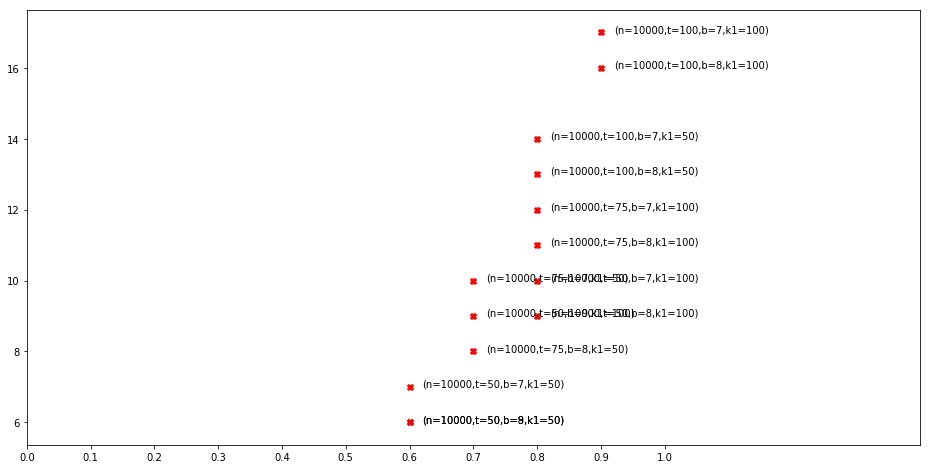

In [153]:
fig = plt.figure(figsize=(16, 8))

colors = cycle(["red", "blue", "orange", "cyan"])
nb_docs_to_color = dict()
for r in iter_results():
    if r["nb_docs"] not in nb_docs_to_color:
        nb_docs_to_color[r["nb_docs"]] = next(colors)

df_rows = []
for i, r in enumerate(iter_results()):
    x, y = np.median(r["recalls"]), np.median(r["latencies"])
    plt.scatter(x, y, marker='X', color=nb_docs_to_color[r["nb_docs"]])
    plt.text(x + 0.02, y, "(n=%d,t=%d,b=%d,k1=%d)" % (r["nb_docs"], r["nb_tables"], r["nb_bits"], r["k1"]))
    
    r["rec_50"] = x
    r["lat_50"] = y
    del r["recalls"], r["latencies"]
    df_rows.append(r)
    
df = pd.DataFrame(df_rows)
df.sort_values(["rec_50", "lat_50"], inplace=True, ascending=False)
display(df[["rec_50", "lat_50", "nb_docs", "nb_tables", "nb_bits", "k2"]])

    
    
plt.xticks(np.linspace(0, 10, 11) / 10, np.linspace(0, 10, 11) / 10)
plt.xlim(0, 1.4)